In [5]:
import time #for sleeping
import numpy as np # for numeric operations
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for visualization

#library
import requests #get html
from bs4 import BeautifulSoup #for scraping
from pprint import pprint #pretty printing
from textblob import TextBlob, Word #for NLP
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords, wordnet

In [6]:
url = "http://quotes.toscrape.com/"
#not forget to----------------------- robots.txt
response = requests.get(url)
page = response.content
page = BeautifulSoup(page, "html.parser")

In [7]:
hashtags_html = page.find_all ("span", class_ = "text")
quotes = [i.get_text() for i in hashtags_html]
pprint(quotes)

['“The world as we have created it is a process of our thinking. It cannot be '
 'changed without changing our thinking.”',
 '“It is our choices, Harry, that show what we truly are, far more than our '
 'abilities.”',
 '“There are only two ways to live your life. One is as though nothing is a '
 'miracle. The other is as though everything is a miracle.”',
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, '
 'must be intolerably stupid.”',
 "“Imperfection is beauty, madness is genius and it's better to be absolutely "
 'ridiculous than absolutely boring.”',
 '“Try not to become a man of success. Rather become a man of value.”',
 '“It is better to be hated for what you are than to be loved for what you are '
 'not.”',
 "“I have not failed. I've just found 10,000 ways that won't work.”",
 "“A woman is like a tea bag; you never know how strong it is until it's in "
 'hot water.”',
 '“A day without sunshine is like, you know, night.”']


In [3]:
def get_quotes (url):
    response = requests.get(url)
    page = response.content
    page = BeautifulSoup(page, "html.parser")
    hashtags_html = page.find_all ("span", class_ = "text")
    quotes = [i.get_text() for i in hashtags_html]
    return quotes    

In [10]:
quotes_scraper("http://quotes.toscrape.com/page/2/")

NameError: name 'quotes_scraper' is not defined

In [14]:
#Method 1
base_url = "http://quotes.toscrape.com/page/"
urls = [base_url+str(i)+"/" for i in range(1,11)] #generate all page urls
all_quotes = []
for i in urls:
    all_quotes.append(get_quotes(i))
    time.sleep(5) #to make the crawler wait for 5 seconds

In [18]:
print(urls)

['http://quotes.toscrape.com/page/1/', 'http://quotes.toscrape.com/page/2/', 'http://quotes.toscrape.com/page/3/', 'http://quotes.toscrape.com/page/4/', 'http://quotes.toscrape.com/page/5/', 'http://quotes.toscrape.com/page/6/', 'http://quotes.toscrape.com/page/7/', 'http://quotes.toscrape.com/page/8/', 'http://quotes.toscrape.com/page/9/', 'http://quotes.toscrape.com/page/10/']


In [15]:
quotes_all = [quotes_scraper(i) for i in urls]

NameError: name 'quotes_scraper' is not defined

In [20]:
print(quotes_all)

[['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", '“Try not to become a man of success. Rather become a man of value.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“I have not failed. I've just found 10,000 ways that won't work.”", "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”", '“A day without sunshine is like, you know, night.”'], ["“This life is what you make it. No matter what, you're going

In [9]:
#Method 2
base = "http://quotes.toscrape.com"
all_quotes=[]
url = base
while True: #loop infinitely
    response = requests.get(url)
    page = response.content
    page = BeautifulSoup(page,"html.parser")
    quotes = [i.get_text() for i in page.find_all("span",class_="text")]
    all_quotes.append(quotes)
    our_li = page.find_all("li",class_="next")
    if len(our_li)==0:
        break #stop the loop if no next page button found
    url = base+our_li[0].findChild("a").get("href") #use navigation to find Child
    time.sleep(3)

#NLP-TextBlob

In [11]:
from textblob import TextBlob, Word #for NLP

In [12]:
first_page = quotes_scraper("http://quotes.toscrape.com/page/1/")
print(first_page)

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", '“Try not to become a man of success. Rather become a man of value.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“I have not failed. I've just found 10,000 ways that won't work.”", "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”", '“A day without sunshine is like, you know, night.”']


In [13]:
quotes_blob = [TextBlob(i)for i in first_page]

In [14]:
print(quotes_blob)

[TextBlob("“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”"), TextBlob("“It is our choices, Harry, that show what we truly are, far more than our abilities.”"), TextBlob("“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”"), TextBlob("“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”"), TextBlob("“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”"), TextBlob("“Try not to become a man of success. Rather become a man of value.”"), TextBlob("“It is better to be hated for what you are than to be loved for what you are not.”"), TextBlob("“I have not failed. I've just found 10,000 ways that won't work.”"), TextBlob("“A woman is like a tea bag; you never know how strong it is until it's in hot water.”"), TextBlob("“A day without sun

In [31]:
quotes_blob[0]

TextBlob("“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”")

In [32]:
quotes_blob[0].sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [33]:
my_blob = TextBlob("R is better than Python")

In [34]:
my_blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.5)

In [36]:
my_blob = TextBlob("I love Armenia")
my_blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [41]:
# my_sentiment = [i.sentiment for i in quotes_blob]

In [38]:
# print(my_sentiment)

[Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.3, subjectivity=0.75), Sentiment(polarity=0.0037878787878787845, subjectivity=0.625), Sentiment(polarity=-0.04999999999999999, subjectivity=0.8), Sentiment(polarity=-0.27777777777777773, subjectivity=0.8333333333333334), Sentiment(polarity=0.3, subjectivity=0.0), Sentiment(polarity=0.09999999999999998, subjectivity=0.6666666666666666), Sentiment(polarity=0.25, subjectivity=0.3), Sentiment(polarity=0.3416666666666667, subjectivity=0.7916666666666667), Sentiment(polarity=0.0, subjectivity=0.0)]


In [39]:
for i in quotes_blob:
    print(i)
    print(i.sentiment)
    print('\n')

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Sentiment(polarity=0.0, subjectivity=0.0)


“It is our choices, Harry, that show what we truly are, far more than our abilities.”
Sentiment(polarity=0.3, subjectivity=0.75)


“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Sentiment(polarity=0.0037878787878787845, subjectivity=0.625)


“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Sentiment(polarity=-0.04999999999999999, subjectivity=0.8)


“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Sentiment(polarity=-0.27777777777777773, subjectivity=0.8333333333333334)


“Try not to become a man of success. Rather become a man of value.”
Sentiment(polarity=0.3, subjectivity=0.0)


“It is better to be hated for what you are than

In [54]:
#tokenization
#quotes_blob[0].words
quotes_blob[0].sentences


[Sentence("“The world as we have created it is a process of our thinking."),
 Sentence("It cannot be changed without changing our thinking.”")]

In [55]:
quotes_blob[0].words

WordList(['“', 'The', 'world', 'as', 'we', 'have', 'created', 'it', 'is', 'a', 'process', 'of', 'our', 'thinking', 'It', 'can', 'not', 'be', 'changed', 'without', 'changing', 'our', 'thinking', '”'])

In [50]:
word1 = Word("bought") 
word2 = Word("animal")
word3 = Word("birds")
word4 = Word("I")
word5 - Word("puppy")

In [46]:
type(word1)

textblob.blob.Word

In [48]:
word2.pluralize()

'animals'

In [51]:
word4.pluralize()

'we'

In [52]:
word3.singularize()

'bird'

In [53]:
quotes_blob[0].tags

[('“', 'IN'),
 ('The', 'DT'),
 ('world', 'NN'),
 ('as', 'IN'),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('created', 'VBN'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('process', 'NN'),
 ('of', 'IN'),
 ('our', 'PRP$'),
 ('thinking', 'NN'),
 ('It', 'PRP'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('be', 'VB'),
 ('changed', 'VBN'),
 ('without', 'IN'),
 ('changing', 'VBG'),
 ('our', 'PRP$'),
 ('thinking', 'NN'),
 ('”', 'NN')]

In [58]:
#lemmatization
print(word1, "->", word1.lemmatize("v"))

bought -> buy


In [60]:
print(word3, "->", word3.lemmatize("n"))

birds -> bird


In [61]:
word1.spellcheck()

[('bought', 1.0)]

In [62]:
Word("bougt").spellcheck()

[('bought', 0.9482758620689655),
 ('bout', 0.034482758620689655),
 ('bough', 0.017241379310344827)]

In [63]:
Word("bougt").correct()

'bought'

In [66]:
word1.definitions

['obtain by purchase; acquire by means of a financial transaction',
 'make illegal payments to in exchange for favors or influence',
 'be worth or be capable of buying',
 'acquire by trade or sacrifice or exchange',
 'accept as true']

In [78]:
word6 = Word("հայերեն")
print(word6.detect_language())

hy


In [77]:
print(word6.translate(from_lang="hy", to = "ru"))

армянин


### NLP-NLTK

In [16]:
freq = nltk.FreqDist(quotes_blob[0].words)
print(freq)

<FreqDist with 22 samples and 24 outcomes>


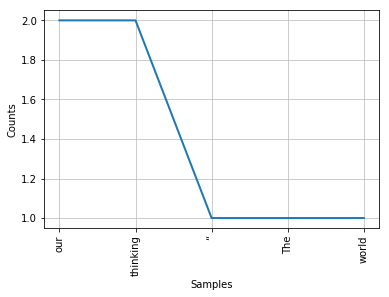

In [86]:
freq.plot(5, cumulative = False)  #5 more popular words

In [17]:
#stemming, crop whatever additional is, giving root
stemmer = PorterStemmer()
stemmer.stem(word2)

NameError: name 'word2' is not defined

In [18]:
#stemming
stemmer = PorterStemmer() 
word_roots = [stemmer.stem(i) for i in first_quote.words]
print(word_roots)

NameError: name 'first_quote' is not defined

In [91]:
#removing stopwords
sw = stopwords.words("english")
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [1]:
quotes_blob[0].words
quotes_1_clean = [i for i in quotes_blob[0].words.lower() if i not in sw]

freq1 = nltk.FreqDist(quotes_1_clean[0].words)
print(freq1)
freq1.plot(5, cumulative = False)

NameError: name 'quotes_blob' is not defined

In [97]:
print(quotes_blob[0].words)
print("........")
print(quotes_1_clean)

['“', 'The', 'world', 'as', 'we', 'have', 'created', 'it', 'is', 'a', 'process', 'of', 'our', 'thinking', 'It', 'can', 'not', 'be', 'changed', 'without', 'changing', 'our', 'thinking', '”']
........
['“', 'world', 'created', 'process', 'thinking', 'changed', 'without', 'changing', 'thinking', '”']


In [101]:
syn = wordnet.synsets("honey")
print(syn[0].definition())

a sweet yellow liquid produced by bees


In [104]:
print(syn[1].definition())

a beloved person; used as terms of endearment


In [ ]:
syn = wordnet.synsets("honey")
print(syn[0].examples())

In [ ]:
#with 

In [106]:
    base = "http://quotes.toscrape.com"
    all_quotes = []
    while True:
        response = requests.get(url)
        page = response.content
        page = BeautifulSoup(page, "html.parser")
        quotes = [i.get_text() for i in page.find_all("span", class_ = "text")]
        all_quotes.append(quotes)
        our_li = page.find_all("li", class_ = "next")
        if len(our_li) == 0:
            break
        next_page = base+our_li[0].find("a").get("href")
        url = next_page
        time.sleep(3)

In [107]:
    #another one
    base = "http://quotes.toscrape.com"
    all_quotes = []
    url = base
    while True:
        response = requests.get(url)
        page = response.content
        page = BeautifulSoup(page, "html.parser")
        quotes = [i.get_text() for i in page.find_all("span", class_ = "text")]
        all_quotes.append(quotes)
        our_li = page.find_all("li", class_ = "next")
        if len(our_li) == 0:
            break
        url = base+our_li[0].find("a").get("href")
        time.sleep(3)

In [108]:
len(all_quotes)

10

In [119]:

url = "http://www.tert.am/en/"
response = requests.get(url)
page = response.content
page = BeautifulSoup(page, "html.parser")

In [ ]:
paragraphs = page.find_all("p", class_ = "today-title")

In [131]:
headlines = [i.get_text() for i in paragraphs]
headline = ""
for i in headlines:
    headline = headline + " " + i

In [133]:
blob = TextBlob(headline).lower()
    clean_headlines = [for i in blob[0].words.lower() if i not in sw]

IndentationError: unexpected indent (<ipython-input-133-06b1fb8379ad>, line 2)

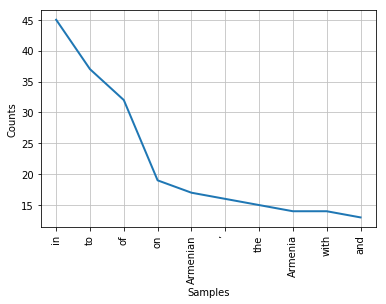

In [132]:
blob = TextBlob(headline)
freq = nltk.FreqDist(blob.words)
freq.plot(10, cumulative = False)

In [129]:
sw = stopwords.words("english")
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
def get_quotes(url):
    response = requests.get(url)
    page = response.content
    page = BeautifulSoup(page,"html.parser")
    hashtags = [i.get_text() for i in page.find_all("span",class_='text')]
    return hashtags


# In[3]:


#Method 1
base_url = "http://quotes.toscrape.com/page/"
urls = [base_url+str(i)+"/" for i in range(1,11)] #generate all page urls
all_quotes = []
for i in urls:
    all_quotes.append(get_quotes(i))
    time.sleep(5) #to make the crawler wait for 5 seconds